<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/etc/Practice/AirPassengers_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA Practice 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/LoadForecasting/
!pwd

/content/drive/MyDrive/LoadForecasting
/content/drive/MyDrive/LoadForecasting


In [ ]:
#!pip install pmdarima

import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns

plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

<ipython-input-4-03b608f7651b>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-4-03b608f7651b>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data = pd.read_csv('AirPassengers.csv')
data = data.rename(columns={'Month': 'month', '#Passengers': 'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Box-Jenkins ARIMA Procedure

- Data Preprocessing
- Identify Model to be Tentatively Entertainted
- Estimate Parameters
- Diagnosis Check
- Use Model to Forecast

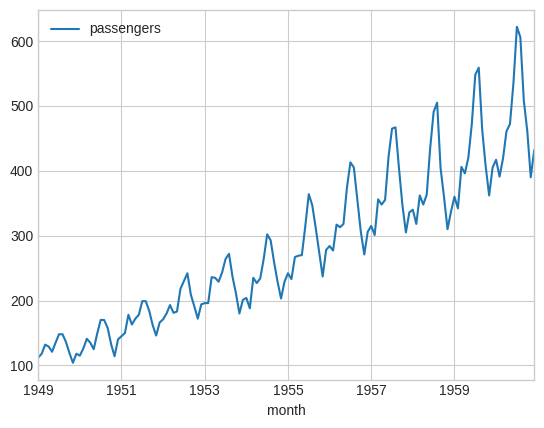

In [ ]:
# Raw data plot
fig = data.plot()

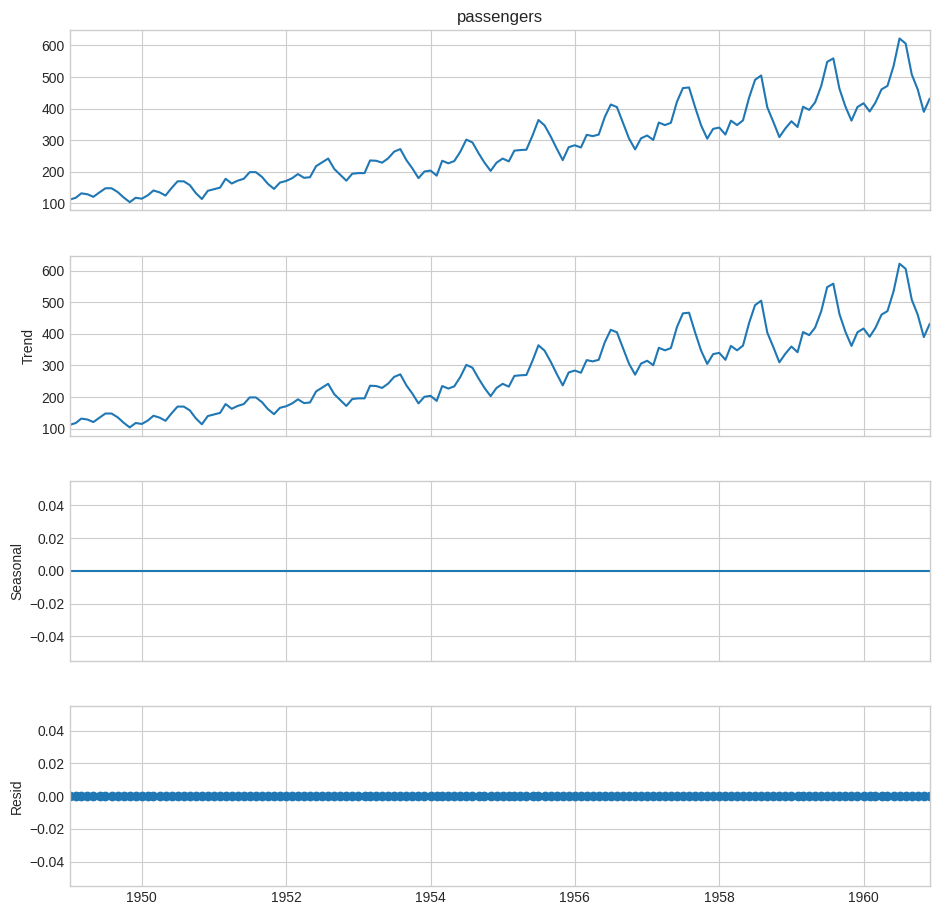

In [ ]:
# Seasonal decomposition plot : Seasonal decomposition using moving averages.
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

# Observed : observed data
# Trend : The estimated trend component
# Seasonal : The estimated seasonal component
# resid : The estimated residuals

decomposition = sm.tsa.seasonal_decompose(data['passengers'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
# Train:Test = 8:2
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

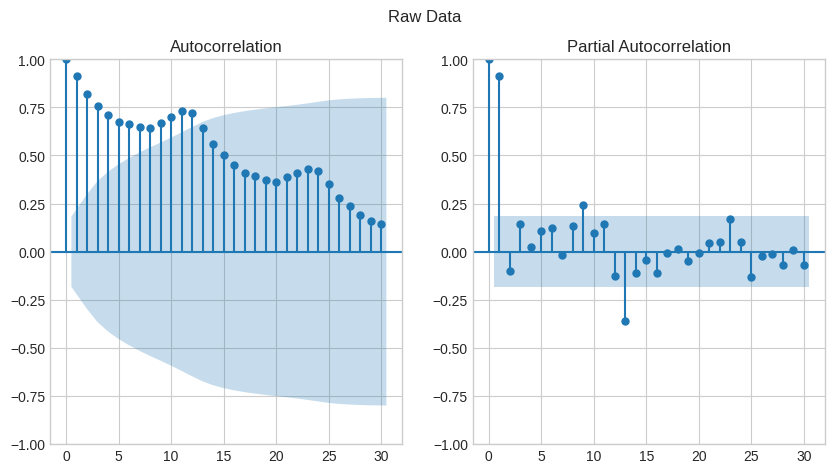

In [ ]:
# ACF, PACF plot

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);  # Modify not to generate graph twice

In [ ]:
# Differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()
diff_train_data = diff_train_data.dropna()
print('####### Raw Data #######')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)

####### Raw Data #######
            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]
### Differenced Data ###
month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1958-03-01    44.0
1958-04-01   -14.0
1958-05-01    15.0
1958-06-01    72.0
1958-07-01    56.0
Name: passengers, Length: 114, dtype: float64


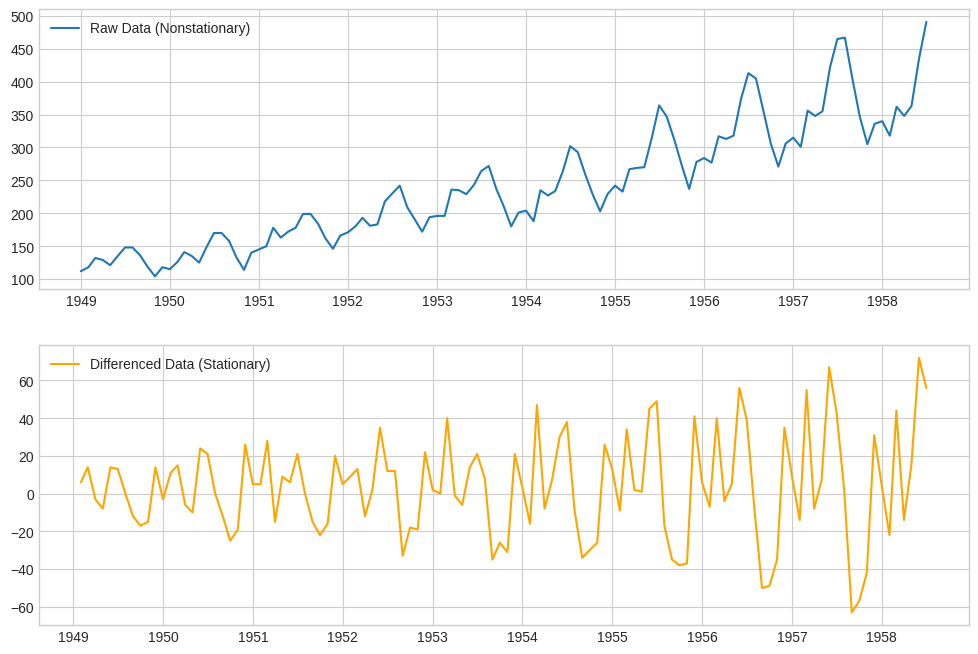

In [ ]:
# Differenced data plot

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['passengers'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange') # first difference (t - (t-1))
plt.legend(['Differenced Data (Stationary)'])
plt.show()

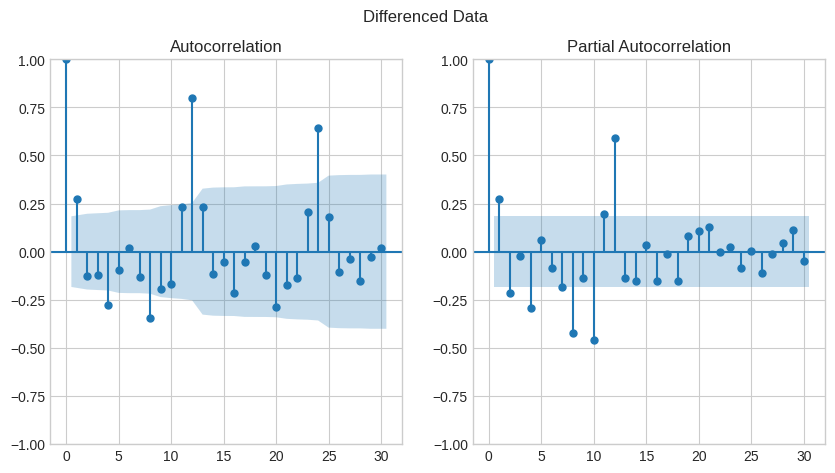

In [ ]:
# ACF, PACF plot

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);  # Modify not to generate graph twice

In [ ]:
# ARIMA model fitting
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -532.268
Date:                Sat, 27 Apr 2024   AIC                           1068.536
Time:                        00:08:35   BIC                           1074.008
Sample:                             0   HQIC                          1070.757
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2904      0.089      3.278      0.001       0.117       0.464
sigma2       664.7320     89.253      7.448      0.000     489.800     839.664
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.57   Prob(JB):                         0.20
Heteroskedasticity (H):               6.18   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Parameter search

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 1, 0) >> AIC : 1076.27
ARIMA: (0, 1, 1) >> AIC : 1063.65
ARIMA: (0, 1, 2) >> AIC : 1060.69
ARIMA: (1, 1, 0) >> AIC : 1068.54
ARIMA: (1, 1, 1) >> AIC : 1058.25
ARIMA: (1, 1, 2) >> AIC : 1057.33
ARIMA: (2, 1, 0) >> AIC : 1065.64
ARIMA: (2, 1, 1) >> AIC : 1058.65
ARIMA: (2, 1, 2) >> AIC : 1057.52


In [ ]:
# Search optimal parameters

optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((1, 1, 2), 1057.33)]

In [ ]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -524.664
Date:                Sat, 27 Apr 2024   AIC                           1057.328
Time:                        00:08:36   BIC                           1068.272
Sample:                             0   HQIC                          1061.769
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5387      0.128      4.219      0.000       0.288       0.789
ma.L1         -0.2053      0.122     -1.688      0.091      -0.444       0.033
ma.L2         -0.5606      0.084     -6.647      0.000      -0.726      -0.395
sigma2       578.5728    105.827      5.467      0.000     371.155     785.991
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.47   Prob(JB):                         0.09
Heteroskedasticity (H):               5.54   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictResult = model_opt_fit.get_forecast(len(test_data))
predicted_value = predictResult.predicted_mean
predicted_ub = predictResult.conf_int()[:,1]
predicted_lb = predictResult.conf_int()[:,0]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

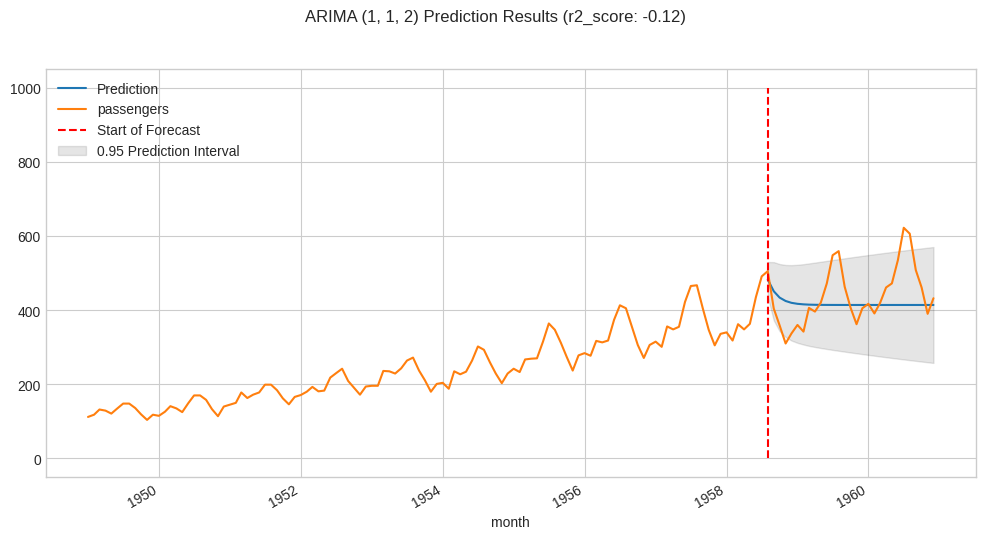

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(predict_index, predicted_value, label='Prediction')
data.plot(ax=ax);
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='Start of Forecast');
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')
plt.show()

In [ ]:
# Parameter search

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

aic=[]
params=[]
for i in pdq:
  for j in seasonal_pdq:
    try:
      model = SARIMAX(train_data.values, order=(i), seasonal_order=(j))
      model_fit = model.fit()
      print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic,2)}')
      aic.append(round(model_fit.aic,2))
      params.append((i,j))
    except:
      continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMA: (0, 1, 0)(0, 1, 0, 12) >> AIC : 757.83
SARIMA: (0, 1, 0)(0, 1, 1, 12) >> AIC : 756.99
SARIMA: (0, 1, 0)(0, 1, 2, 12) >> AIC : 758.83
SARIMA: (0, 1, 0)(1, 1, 0, 12) >> AIC : 756.96
SARIMA: (0, 1, 0)(1, 1, 1, 12) >> AIC : 758.92
SARIMA: (0, 1, 0)(1, 1, 2, 12) >> AIC : 754.42
SARIMA: (0, 1, 0)(2, 1, 0, 12) >> AIC : 758.87
SARIMA: (0, 1, 0)(2, 1, 1, 12) >> AIC : 760.73


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (0, 1, 0)(2, 1, 2, 12) >> AIC : 754.91
SARIMA: (0, 1, 1)(0, 1, 0, 12) >> AIC : 756.01
SARIMA: (0, 1, 1)(0, 1, 1, 12) >> AIC : 756.38
SARIMA: (0, 1, 1)(0, 1, 2, 12) >> AIC : 757.65
SARIMA: (0, 1, 1)(1, 1, 0, 12) >> AIC : 756.17
SARIMA: (0, 1, 1)(1, 1, 1, 12) >> AIC : 758.11
SARIMA: (0, 1, 1)(1, 1, 2, 12) >> AIC : 751.73
SARIMA: (0, 1, 1)(2, 1, 0, 12) >> AIC : 757.99
SARIMA: (0, 1, 1)(2, 1, 1, 12) >> AIC : 753.79


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (0, 1, 1)(2, 1, 2, 12) >> AIC : 75.87
SARIMA: (0, 1, 2)(0, 1, 0, 12) >> AIC : 757.78
SARIMA: (0, 1, 2)(0, 1, 1, 12) >> AIC : 758.04
SARIMA: (0, 1, 2)(0, 1, 2, 12) >> AIC : 759.28
SARIMA: (0, 1, 2)(1, 1, 0, 12) >> AIC : 757.81
SARIMA: (0, 1, 2)(1, 1, 1, 12) >> AIC : 759.75
SARIMA: (0, 1, 2)(1, 1, 2, 12) >> AIC : 753.5
SARIMA: (0, 1, 2)(2, 1, 0, 12) >> AIC : 759.64
SARIMA: (0, 1, 2)(2, 1, 1, 12) >> AIC : 755.48
SARIMA: (1, 1, 0)(0, 1, 0, 12) >> AIC : 755.5
SARIMA: (1, 1, 0)(0, 1, 1, 12) >> AIC : 755.98
SARIMA: (1, 1, 0)(0, 1, 2, 12) >> AIC : 757.1
SARIMA: (1, 1, 0)(1, 1, 0, 12) >> AIC : 755.75
SARIMA: (1, 1, 0)(1, 1, 1, 12) >> AIC : 757.65
SARIMA: (1, 1, 0)(1, 1, 2, 12) >> AIC : 751.15
SARIMA: (1, 1, 0)(2, 1, 0, 12) >> AIC : 757.45
SARIMA: (1, 1, 0)(2, 1, 1, 12) >> AIC : 752.99


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (1, 1, 0)(2, 1, 2, 12) >> AIC : 78.02
SARIMA: (1, 1, 1)(0, 1, 0, 12) >> AIC : 756.02
SARIMA: (1, 1, 1)(0, 1, 1, 12) >> AIC : 756.63
SARIMA: (1, 1, 1)(0, 1, 2, 12) >> AIC : 757.75
SARIMA: (1, 1, 1)(1, 1, 0, 12) >> AIC : 756.41
SARIMA: (1, 1, 1)(1, 1, 1, 12) >> AIC : 758.26


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (1, 1, 1)(1, 1, 2, 12) >> AIC : 752.53
SARIMA: (1, 1, 1)(2, 1, 0, 12) >> AIC : 758.03
SARIMA: (1, 1, 1)(2, 1, 1, 12) >> AIC : 754.16
SARIMA: (1, 1, 2)(0, 1, 0, 12) >> AIC : 757.92
SARIMA: (1, 1, 2)(0, 1, 1, 12) >> AIC : 758.44
SARIMA: (1, 1, 2)(0, 1, 2, 12) >> AIC : 759.63
SARIMA: (1, 1, 2)(1, 1, 0, 12) >> AIC : 758.22
SARIMA: (1, 1, 2)(1, 1, 1, 12) >> AIC : 760.1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (1, 1, 2)(1, 1, 2, 12) >> AIC : 754.53
SARIMA: (1, 1, 2)(2, 1, 0, 12) >> AIC : 759.92


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (1, 1, 2)(2, 1, 1, 12) >> AIC : 756.16
SARIMA: (2, 1, 0)(0, 1, 0, 12) >> AIC : 756.77
SARIMA: (2, 1, 0)(0, 1, 1, 12) >> AIC : 757.23
SARIMA: (2, 1, 0)(0, 1, 2, 12) >> AIC : 758.31
SARIMA: (2, 1, 0)(1, 1, 0, 12) >> AIC : 756.98
SARIMA: (2, 1, 0)(1, 1, 1, 12) >> AIC : 758.86
SARIMA: (2, 1, 0)(1, 1, 2, 12) >> AIC : 752.77
SARIMA: (2, 1, 0)(2, 1, 0, 12) >> AIC : 758.65
SARIMA: (2, 1, 0)(2, 1, 1, 12) >> AIC : 754.5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA: (2, 1, 0)(2, 1, 2, 12) >> AIC : 762.49
SARIMA: (2, 1, 1)(0, 1, 0, 12) >> AIC : 757.98
SARIMA: (2, 1, 1)(0, 1, 1, 12) >> AIC : 758.54
SARIMA: (2, 1, 1)(0, 1, 2, 12) >> AIC : 759.69
SARIMA: (2, 1, 1)(1, 1, 0, 12) >> AIC : 758.31
SARIMA: (2, 1, 1)(1, 1, 1, 12) >> AIC : 760.18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (2, 1, 1)(1, 1, 2, 12) >> AIC : 754.53
SARIMA: (2, 1, 1)(2, 1, 0, 12) >> AIC : 759.98
SARIMA: (2, 1, 1)(2, 1, 1, 12) >> AIC : 756.17


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (2, 1, 1)(2, 1, 2, 12) >> AIC : 764.43
SARIMA: (2, 1, 2)(0, 1, 0, 12) >> AIC : 755.2
SARIMA: (2, 1, 2)(0, 1, 1, 12) >> AIC : 755.99
SARIMA: (2, 1, 2)(0, 1, 2, 12) >> AIC : 759.77
SARIMA: (2, 1, 2)(1, 1, 0, 12) >> AIC : 755.82
SARIMA: (2, 1, 2)(1, 1, 1, 12) >> AIC : 757.71


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA: (2, 1, 2)(1, 1, 2, 12) >> AIC : 752.33
SARIMA: (2, 1, 2)(2, 1, 0, 12) >> AIC : 757.56
SARIMA: (2, 1, 2)(2, 1, 1, 12) >> AIC : 753.95
SARIMA: (2, 1, 2)(2, 1, 2, 12) >> AIC : 760.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Search optimal parameters

optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[(((0, 1, 1), (2, 1, 2, 12)), 75.87)]

In [ ]:
model_opt = SARIMAX(train_data.values, order=optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  115
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                 -31.937
Date:                                 Sat, 27 Apr 2024   AIC                             75.874
Time:                                         00:11:32   BIC                             91.624
Sample:                                              0   HQIC                            82.252
                                                 - 115                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3145   1.03e-06  -3.06e+05      0.000      -0.314      -0.314
ar.S.L12       0.0015   1.04e-06   1393.463      0.000       0.001       0.001
ar.S.L24       0.9985   1.63e-06   6.13e+05      0.000       0.999       0.999
ma.S.L12       0.0015   2.46e-06    618.185      0.000       0.002       0.002
ma.S.L24      -0.9955   4.34e-07  -2.29e+06      0.000      -0.996      -0.996
sigma2        93.1304   3.49e-09   2.67e+10      0.000      93.130      93.130
===================================================================================
Ljung-Box (L1) (Q):                  29.43   Jarque-Bera (JB):              8656.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             6.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.71e+21. Standard errors may be unstable.
"""

In [ ]:
predictResult = model_opt_fit.get_forecast(len(test_data))
predicted_value = predictResult.predicted_mean
predicted_ub = predictResult.conf_int()[:,1]
predicted_lb = predictResult.conf_int()[:,0]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

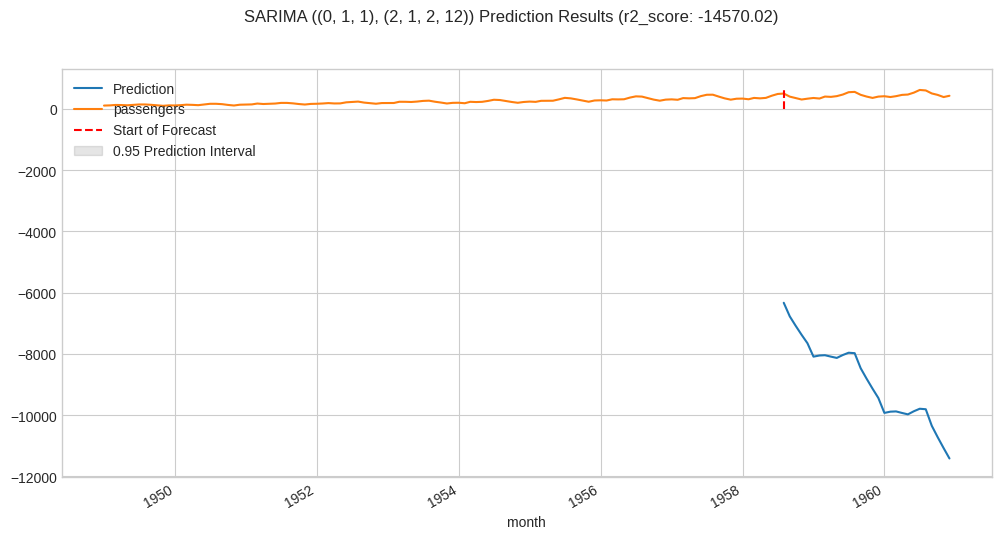

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(predict_index, predicted_value, label='Prediction')
data.plot(ax=ax);
ax.vlines('1958-08-01', 0, 700, linestyle='--', color='r', label='Start of Forecast');
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')
plt.show()